In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
drug_consumption_quantified = fetch_ucirepo(id=373) 
  
# data (as pandas dataframes) 
X = drug_consumption_quantified.data.features 
y = drug_consumption_quantified.data.targets 
  
# metadata 
print(drug_consumption_quantified.metadata) 
  
# variable information 
print(drug_consumption_quantified.variables) 

{'uci_id': 373, 'name': 'Drug Consumption (Quantified)', 'repository_url': 'https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified', 'data_url': 'https://archive.ics.uci.edu/static/public/373/data.csv', 'abstract': 'Classify type of drug consumer by personality data', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1885, 'num_features': 12, 'feature_types': ['Real'], 'demographics': ['Age', 'Gender', 'Education Level', 'Nationality', 'Ethnicity'], 'target_col': ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5TC7S', 'creators': ['Elaine Fehrman', 'Vincent Egan', 'Evgeny Mirkes'], 'intro_paper': {'ID': 413, 

In [4]:
X.isnull().sum() # no holes in input features or targets

age          0
gender       0
education    0
country      0
ethnicity    0
nscore       0
escore       0
oscore       0
ascore       0
cscore       0
impuslive    0
ss           0
dtype: int64

In [5]:
y.isnull().sum()

alcohol      0
amphet       0
amyl         0
benzos       0
caff         0
cannabis     0
choc         0
coke         0
crack        0
ecstasy      0
heroin       0
ketamine     0
legalh       0
lsd          0
meth         0
mushrooms    0
nicotine     0
semer        0
vsa          0
dtype: int64

In [6]:
for column in X.columns:
    print(column)
    print("Max: ", X[column].max())
    print("Min: ", X[column].min())
    print("Mean: ", X[column].mean())
    print("Standard Deviation: ", X[column].std())
    print()

age
Max:  2.59171
Min:  -0.95197
Mean:  0.03460995225464192
Standard Deviation:  0.8783603244968102

gender
Max:  0.48246
Min:  -0.48246
Mean:  -0.0002559469496021218
Standard Deviation:  0.4825879565066993

education
Max:  1.98437
Min:  -2.43591
Mean:  -0.003806090185676411
Standard Deviation:  0.9500782517816255

country
Max:  0.96082
Min:  -0.57009
Mean:  0.3555421697612732
Standard Deviation:  0.7003350991862647

ethnicity
Max:  1.90725
Min:  -1.10702
Mean:  -0.30957720424403185
Standard Deviation:  0.16622580875599505

nscore
Max:  3.27393
Min:  -3.46436
Mean:  4.660477453581443e-05
Standard Deviation:  0.998105935847349

escore
Max:  3.27393
Min:  -3.27393
Mean:  -0.0001628010610079536
Standard Deviation:  0.9974484946397093

oscore
Max:  2.90161
Min:  -3.27393
Mean:  -0.0005343978779840694
Standard Deviation:  0.9962285537660908

ascore
Max:  3.46436
Min:  -3.46436
Mean:  -0.0002449655172413689
Standard Deviation:  0.9974404928094339

cscore
Max:  3.46436
Min:  -3.46436
Mean:  -

In [7]:
#kind funny they misspelled impulsive as a column name
X.rename(columns={'impuslive': 'impulsive'}, inplace=True)

C:\Users\unavr\AppData\Local\Temp\ipykernel_20200\821914414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={'impuslive': 'impulsive'}, inplace=True)


Some Feature Notes from the site:

Psychologocial Markers:
Nscore (Real) is NEO-FFI-R Neuroticism
Escore (Real) is NEO-FFI-R Extraversion
Oscore (Real) is NEO-FFI-R Openness to experience
Ascore (Real) is NEO-FFI-R Agreeableness
Cscore (Real) is NEO-FFI-R Conscientiousness
Impulsive (Real) is impulsiveness measured by BIS-11
SS (Real) is sensation seeking measured by ImpSS

Age (Real) is age of participant and has one of the values:
     Value    Meaning Cases Fraction
     -0.95197 18-24   643   34.11%
     -0.07854 25-34   481   25.52%
      0.49788 35-44   356   18.89%
      1.09449 45-54   294   15.60%
      1.82213 55-64    93    4.93%
      2.59171 65+      18    0.95%

Gender (Real) is gender of participant:
     Value    Meaning Cases Fraction
      0.48246 Female  942   49.97%
     -0.48246 Male    943   50.03%

Education (Real) is level of education of participant and has one of the values:
     Value    Meaning                                              Cases Fraction
     -2.43591 Left school before 16 years                           28    1.49%
     -1.73790 Left school at 16 years                               99    5.25%
     -1.43719 Left school at 17 years                               30    1.59%
     -1.22751 Left school at 18 years                              100    5.31%
     -0.61113 Some college or university, no certificate or degree 506   26.84%
     -0.05921 Professional certificate/ diploma                    270   14.32%
      0.45468 University degree                                    480   25.46%
      1.16365 Masters degree                                       283   15.01%
      1.98437 Doctorate degree                                      89    4.72%

Country (Real) is country of current residence of participant and has one of the values:
     Value    Meaning             Cases Fraction
     -0.09765 Australia             54   2.86%
      0.24923 Canada                87   4.62%
     -0.46841 New Zealand            5   0.27%
     -0.28519 Other                118   6.26%
      0.21128 Republic of Ireland   20   1.06%
      0.96082 UK                  1044  55.38%
     -0.57009 USA                  557  29.55%

Ethnicity (Real) is ethnicity of participant and has one of the values:
     Value    Meaning           Cases Fraction
     -0.50212 Asian               26   1.38%
     -1.10702 Black               33   1.75%
      1.90725 Mixed-Black/Asian    3   0.16%
      0.12600 Mixed-White/Asian   20   1.06%
     -0.22166 Mixed-White/Black   20   1.06%
      0.11440 Other               63   3.34%
     -0.31685 White             1720  91.25%

In [9]:
X.head(10)

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
5,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
6,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987
7,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593
8,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858
9,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637


In [10]:
y.head()

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [11]:
y.keys()

Index(['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc',
       'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd',
       'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'],
      dtype='object')

In [12]:
# columns to drop: alcohol, caffeine, chocolate, cannabis, semer, nicotine
#Chose to keep legalh (legal highs) column because they mostly still consitute substance abuse that evades legislation

In [13]:
y = y.drop(columns=['alcohol', 'caff', 'choc', 'cannabis', 'semer', 'nicotine'])

In [14]:
y.head()

,amphet,amyl,benzos,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,vsa
0,CL2,CL0,CL2,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
1,CL2,CL2,CL0,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL0
2,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0
3,CL0,CL0,CL3,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL0
4,CL1,CL1,CL0,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL0


Making values binary CL0 through CL2 represents substance use within the past decade while we are looking for CL3 and up (use within the past year)

In [16]:
y = y.replace({'CL[0-2]': 0, 'CL[3-6]': 1}, regex=True)

C:\Users\unavr\AppData\Local\Temp\ipykernel_20200\1713210519.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'CL[0-2]': 0, 'CL[3-6]': 1}, regex=True)


In [17]:
y.head()

,amphet,amyl,benzos,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,vsa
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
y['abuse'] = y.any(axis=1).astype(int) #Leaving a single target value to represent abuse over the myriad of substances
y = y[['abuse']]
y.head()

,abuse
0,0
1,1
2,0
3,1
4,0


In [19]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [20]:
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [21]:
corrdf = pd.concat([X, y], axis=1)
correlation = corrdf.corr()
print(correlation['abuse'])

age         -0.419892
gender      -0.282253
education   -0.239907
country     -0.550881
ethnicity    0.106682
nscore       0.177679
escore      -0.054176
oscore       0.350504
ascore      -0.172004
cscore      -0.295341
impulsive    0.317366
ss           0.442026
abuse        1.000000
Name: abuse, dtype: float64


#### Feature Engineering

Because age and education exist as scales they will just be scaled and dont need dummies
Country and Ethnicity will recieve dummies for being nominal values currently mapped numerically


 ##### Binning Logic

In [25]:
# binning logic for Country and Ethnicity although we soon realized that they just needed dummies or to be dropped
X_binned = X.copy()

def bin_country(value):
    if value < -0.5:
        return 'Other'  # Countries like 'Other' that have lower values
    elif -0.5 <= value < 0:
        return 'Australia'  # Countries with these ranges will be classified as 'Australia'
    elif 0 <= value < 0.25:
        return 'Canada'
    elif 0.25 <= value < 1:
        return 'New Zealand'
    elif 0.25 <= value < 1:
        return 'Republic of Ireland'
    elif value >= 1:
        return 'UK'  # Assign to UK for values >= 1
    else:
        return 'USA'
        
def bin_ethnicity(value):
    if value < -1:
        return 'Black'
    elif -1 <= value < -0.5:
        return 'Mixed-Black/Asian'
    elif -0.5 <= value < 0:
        return 'Mixed-White/Asian'
    elif -0.5 <= value < 0:
        return 'Mixed-White/Black'
    elif 0 < value < 1:
        return 'Other'
    else:
        return 'White' 

# Apply binning functions
X_binned.loc[:, 'Country_binned'] = X_binned['country'].apply(bin_country)
X_binned.loc[:, 'Ethnicity_binned'] = X_binned['ethnicity'].apply(bin_ethnicity)

In [26]:
X.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [27]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['age', 'gender', 'education', 'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impulsive', 'ss']
X_scaled = X
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

C:\Users\unavr\AppData\Local\Temp\ipykernel_20200\3512328496.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])


In [28]:
X_scaled.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss
0,0.409137,1.0,0.537681,0.96082,0.12600,0.560562,0.412116,0.435690,0.367654,0.499040,0.428474,0.224398
1,0.246475,0.0,1.000000,0.96082,-0.31685,0.413474,0.796106,0.762567,0.609827,0.479394,0.337920,0.465658
2,0.409137,0.0,0.537681,0.96082,-0.31685,0.444788,0.622976,0.392939,0.266061,0.353580,0.215401,0.619957
3,0.000000,1.0,0.814329,0.96082,-0.31685,0.492045,0.376883,0.527023,0.585213,0.584415,0.215401,0.224398
4,0.409137,1.0,1.000000,0.96082,-0.31685,0.623275,0.250544,0.456995,0.456454,0.688508,0.428474,0.465658


In [29]:
#y = y.ravel()
print(type(X_scaled))

<class 'pandas.core.frame.DataFrame'>


In [37]:
from sklearn.cluster import KMeans
X_combined = pd.concat([pd.DataFrame(X_scaled),y.reset_index(drop=True)], axis=1)
kmeans = KMeans(n_clusters=4,random_state=42)
cluster = kmeans.fit_predict(X_scaled)

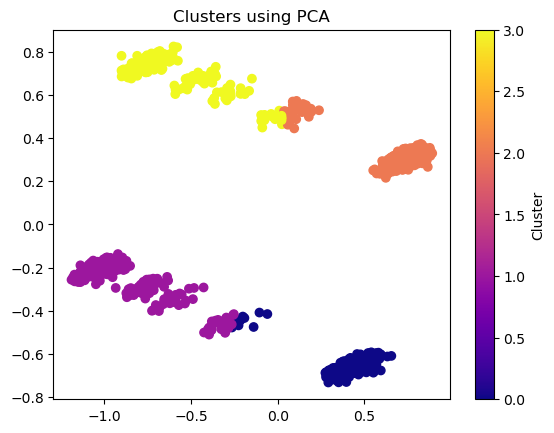

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0],X_pca[:,1],c=cluster,cmap='plasma')
plt.title('Clusters using PCA')
plt.colorbar(label='Cluster')

plt.colorbar
plt.show()

Drug Consumption by Cluster:             abuse
cluster          
0        0.422989
1        0.927165
2        0.249619
3        0.792982


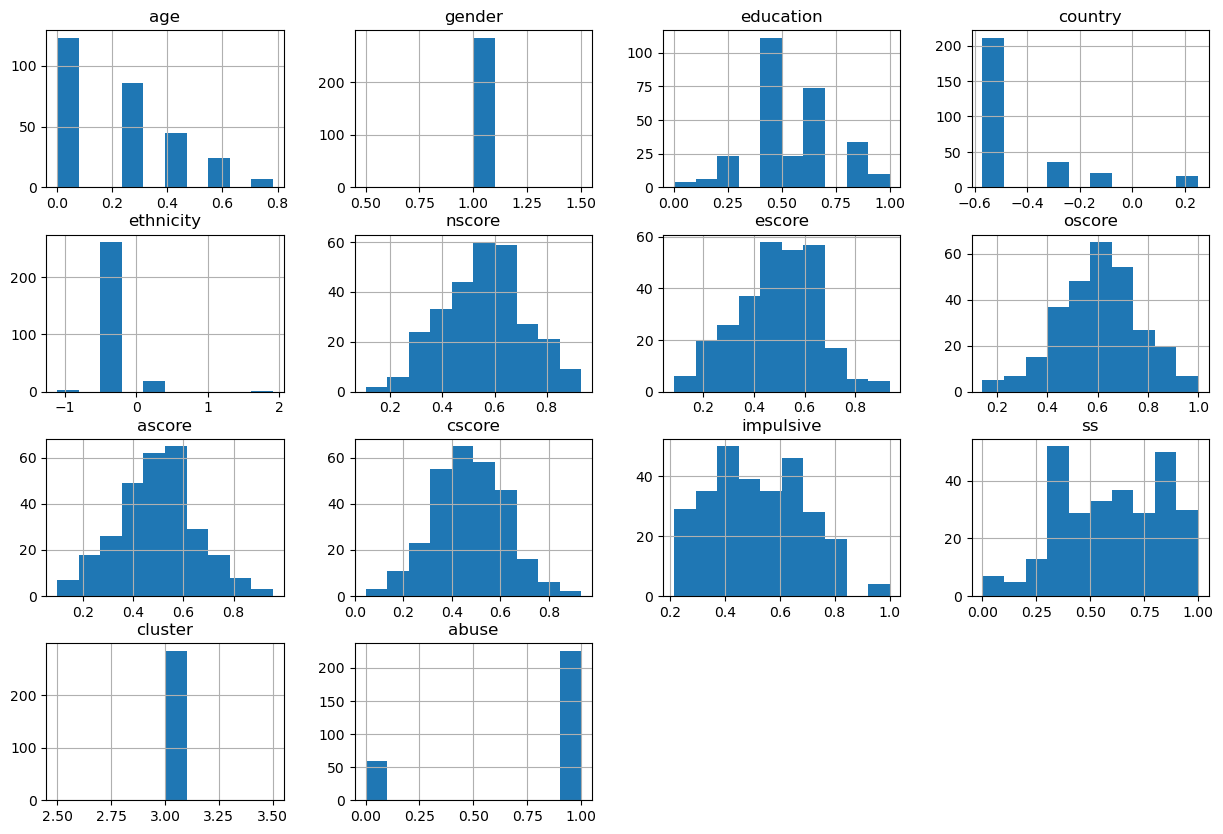

In [41]:
X_with_clusters = pd.DataFrame(X_scaled, columns=X.columns)
X_with_clusters['cluster'] = cluster
combined = pd.concat([X_with_clusters, y.reset_index(drop=True)], axis=1)

drug_consumption_by_cluster = combined.groupby('cluster')[y.columns].mean()
print("Drug Consumption by Cluster:", drug_consumption_by_cluster)

combined[combined['cluster'] == 3].hist(figsize=(15, 10))
plt.show()

Drug Consumption by Cluster:             abuse
cluster          
0        0.422989
1        0.927165
2        0.249619
3        0.792982


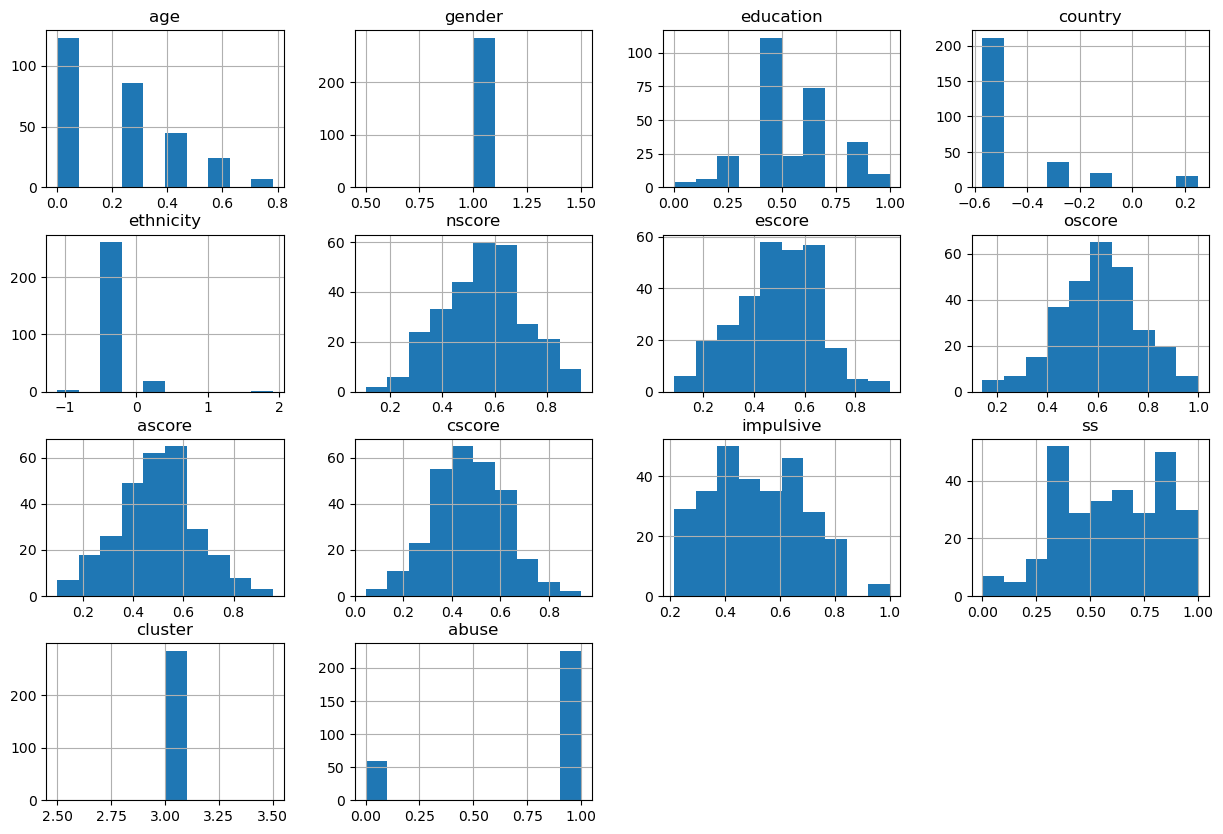

In [43]:
X_with_clusters = pd.DataFrame(X_scaled, columns=X.columns)
X_with_clusters['cluster'] = cluster
combined = pd.concat([X_with_clusters, y.reset_index(drop=True)], axis=1)

drug_consumption_by_cluster = combined.groupby('cluster')[y.columns].mean()
print("Drug Consumption by Cluster:", drug_consumption_by_cluster)

combined[combined['cluster'] == 3].hist(figsize=(15, 10))
plt.show()

In [45]:
#X_Num = X_scaled.drop(columns=['Country_binned', 'Ethnicity_binned'])#numeric only fields for pretty much every algorithm

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3, random_state=101)
#X_train, X_test, y_train, y_test = train_test_split(X_scaled.drop(columns=['ethnicity', 'country']), y, test_size=0.3, random_state=101)
#after some testing despite the fact that they weren't binned and would be nominal and treated as a scale, algorithms performed better with
#the country and ethnicity features even as numeric values so X_scaled was used, obviosuly the bin and numeric combination cant work for most algorithms

# Random Forest

In [52]:
estimators = range(10,101)[::10]
depths = [1, 2, 4, 8, 16, 64, 256]
accuracies_final = np.zeros((len(estimators), len(depths)))
for idx, estimator in enumerate(estimators):
    for i, depth in enumerate(depths):
        rf = RandomForestClassifier(criterion='entropy', max_depth=depth, random_state=42, n_estimators= estimator, n_jobs = -2)
        scores = cross_val_score(rf, X_train, y_train, cv = 5,  n_jobs = -2)
        accuracies_final[idx][i] = np.mean(scores)

In [53]:
optimal_idx = np.argmax(accuracies_final, axis=None)
row, col = np.unravel_index(optimal_idx, accuracies_final.shape)
print("Optimal Estimator", estimators[row])
print("Optimal Depth", depths[col])
optimal_estimator = estimators[row]
optimal_depth = depths[col]

Optimal Estimator 90
Optimal Depth 16


[0.84848485 0.81060606 0.79545455 0.73484848 0.82575758 0.8030303
 0.87121212 0.82575758 0.82575758 0.86259542]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       252
           1       0.80      0.83      0.82       314

    accuracy                           0.79       566
   macro avg       0.79      0.79      0.79       566
weighted avg       0.79      0.79      0.79       566

Mean Accuracy: 0.8203504510756421
MSE 0.2067137809187279
MAE 0.2067137809187279
r2 Score 0.1631028207461328


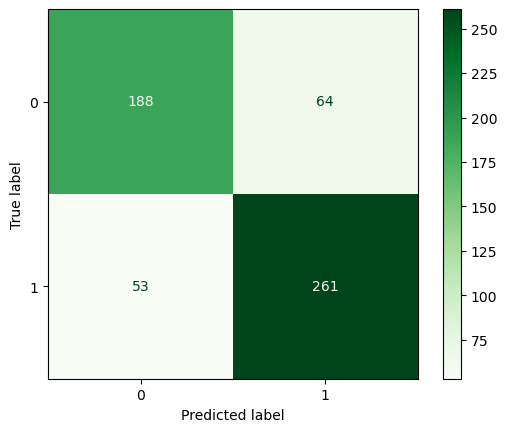

In [110]:
#because i apparently cant use a pd dataframe for scorees rip without an error, so we're using numpy arrays
y_train = y_train.squeeze()
y_test = y_test.squeeze()

f = RandomForestClassifier(criterion='entropy', max_depth=optimal_depth, random_state=42, n_estimators= optimal_estimator, n_jobs = -2)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

scores = cross_val_score(rf, X_train, y_train, cv = 10,  n_jobs = -2)
print(scores)
print("Classification Report:\n", classification_report(y_test, y_predict))
print("Mean Accuracy:",scores.mean())
print("MSE", mean_squared_error(y_test, y_predict))
print("MAE",  mean_absolute_error(y_test, y_predict))
print("r2 Score", r2_score(y_test, y_predict))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot(cmap='Greens')
plt.show() #this should show for you (Prof. Brennan) without plt.show() when the code is run, currently having issues with my library

#### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=12000,C=10**3) #Threshold where increasing c and max_iter anymore doesnt do anything
LR.fit(X_train,y_train)

LogisticRegression(C=1000, max_iter=12000)

[0.83333333 0.78787879 0.82575758 0.77272727 0.84090909 0.78787879
 0.82575758 0.79545455 0.84848485 0.89312977]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       252
           1       0.82      0.83      0.83       314

    accuracy                           0.81       566
   macro avg       0.80      0.80      0.80       566
weighted avg       0.81      0.81      0.81       566

Mean Accuracy: 0.8211311589174185
MSE 0.19434628975265017
MAE 0.19434628975265017
r2 Score 0.21317359215448384


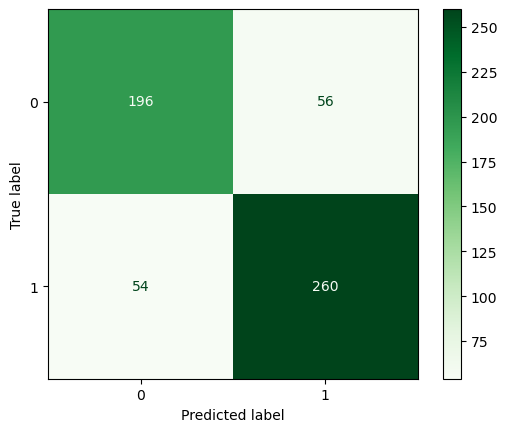

In [112]:
y_predict = LR.predict(X_test)
scores = cross_val_score(LR, X_train, y_train, cv = 10,  n_jobs = -2)
print(scores)
print("Classification Report:\n", classification_report(y_test, y_predict))
print("Mean Accuracy:",scores.mean())
print("MSE", mean_squared_error(y_test, y_predict))
print("MAE",  mean_absolute_error(y_test, y_predict))
print("r2 Score", r2_score(y_test, y_predict))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot(cmap='Greens')
plt.show()

In [59]:
from sklearn.naive_bayes import GaussianNB
GB = GaussianNB()
GB.fit(X_train, y_train)
y_predict = GB.predict(X_test)

[0.82575758 0.79545455 0.81818182 0.76515152 0.84848485 0.79545455
 0.81818182 0.81818182 0.81818182 0.88549618]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       252
           1       0.82      0.83      0.83       314

    accuracy                           0.81       566
   macro avg       0.80      0.80      0.80       566
weighted avg       0.81      0.81      0.81       566

Mean Accuracy: 0.8188526486236409
MSE 0.19434628975265017
MAE 0.19434628975265017
r2 Score 0.21317359215448384


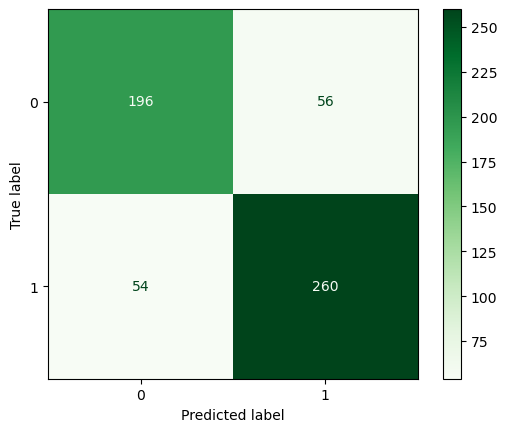

In [116]:
scores = cross_val_score(GB, X_train, y_train, cv = 10,  n_jobs = -2)
print(scores)
print("Classification Report:\n", classification_report(y_test, y_predict))
print("Mean Accuracy:",scores.mean())
print("MSE", mean_squared_error(y_test, y_predict))
print("MAE",  mean_absolute_error(y_test, y_predict))
print("r2 Score", r2_score(y_test, y_predict))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot(cmap='Greens')
plt.show()

In [61]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV    
GS = GridSearchCV(SVC(), param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[100,10,1,0.1,0.01,0.001]}, verbose=3)

In [62]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ................C=0.001, gamma=100;, score=0.553 total time=   0.0s
[CV 2/5] END ................C=0.001, gamma=100;, score=0.553 total time=   0.0s
[CV 3/5] END ................C=0.001, gamma=100;, score=0.553 total time=   0.0s
[CV 4/5] END ................C=0.001, gamma=100;, score=0.557 total time=   0.0s
[CV 5/5] END ................C=0.001, gamma=100;, score=0.555 total time=   0.0s
[CV 1/5] END .................C=0.001, gamma=10;, score=0.553 total time=   0.0s
[CV 2/5] END .................C=0.001, gamma=10;, score=0.553 total time=   0.0s
[CV 3/5] END .................C=0.001, gamma=10;, score=0.553 total time=   0.0s
[CV 4/5] END .................C=0.001, gamma=10;, score=0.557 total time=   0.0s
[CV 5/5] END .................C=0.001, gamma=10;, score=0.555 total time=   0.0s
[CV 1/5] END ..................C=0.001, gamma=1;, score=0.553 total time=   0.0s
[CV 2/5] END ..................C=0.001, gamma=1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [100, 10, 1, 0.1, 0.01, 0.001]},
             verbose=3)

In [63]:
GS.best_estimator_

SVC(C=100, gamma=0.001)

[0.81818182 0.79545455 0.81060606 0.79545455 0.85606061 0.77272727
 0.82575758 0.81818182 0.83333333 0.8778626 ]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       252
           1       0.83      0.79      0.81       314

    accuracy                           0.80       566
   macro avg       0.79      0.80      0.80       566
weighted avg       0.80      0.80      0.80       566

Mean Accuracy: 0.8203620171177424
MSE 0.20318021201413428
MAE 0.20318021201413428
r2 Score 0.17740875543423318


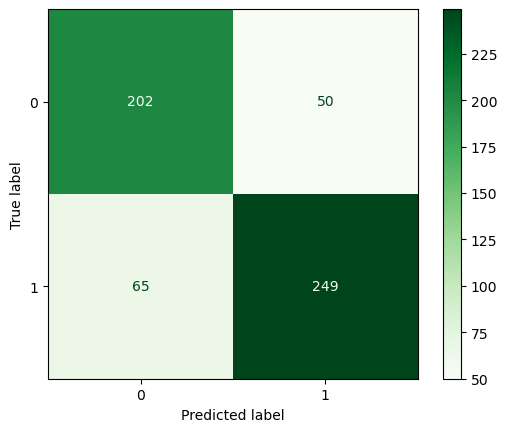

In [118]:
GS.best_estimator_
y_predict = GS.predict(X_test)
scores = cross_val_score(GS, X_train, y_train, cv = 10,  n_jobs = -2)
print(scores)
print("Classification Report:\n", classification_report(y_test, y_predict))
print("Mean Accuracy:",scores.mean())
print("MSE", mean_squared_error(y_test, y_predict))
print("MAE",  mean_absolute_error(y_test, y_predict))
print("r2 Score", r2_score(y_test, y_predict))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot(cmap='Greens')
plt.show()

In [65]:
import xgboost as xgb

In [66]:
XGB_model = xgb.XGBClassifier(objective='binary:hinge', eval_metric='logloss') #binary logistic could also be interesting as it provides the probability of each target

In [67]:
GSxgb = GridSearchCV(XGB_model, param_grid={'n_estimators':[16, 32, 69, 100], 'max_depth':[2, 3, 4,8]}, verbose=3)

In [68]:
GSxgb.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ......max_depth=2, n_estimators=16;, score=0.807 total time=   0.5s
[CV 2/5] END ......max_depth=2, n_estimators=16;, score=0.765 total time=   0.0s
[CV 3/5] END ......max_depth=2, n_estimators=16;, score=0.750 total time=   0.0s
[CV 4/5] END ......max_depth=2, n_estimators=16;, score=0.795 total time=   0.0s
[CV 5/5] END ......max_depth=2, n_estimators=16;, score=0.837 total time=   0.0s
[CV 1/5] END ......max_depth=2, n_estimators=32;, score=0.822 total time=   0.0s
[CV 2/5] END ......max_depth=2, n_estimators=32;, score=0.788 total time=   0.0s
[CV 3/5] END ......max_depth=2, n_estimators=32;, score=0.761 total time=   0.0s
[CV 4/5] END ......max_depth=2, n_estimators=32;, score=0.814 total time=   0.0s
[CV 5/5] END ......max_depth=2, n_estimators=32;, score=0.837 total time=   0.0s
[CV 1/5] END ......max_depth=2, n_estimators=69;, score=0.799 total time=   0.0s
[CV 2/5] END ......max_depth=2, n_estimators=69;

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='binary:hinge', ...),
             param_grid={'max_depth': [2, 3, 4, 8],
                         'n_estimators': [16, 32, 69, 100]},
             verbose=3)

In [69]:
GSxgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=69,
              n_jobs=None, num_parallel_tree=None, objective='binary:hinge', ...)

[0.81060606 0.81060606 0.83333333 0.74242424 0.81060606 0.77272727
 0.82575758 0.8030303  0.81818182 0.87022901]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73       252
           1       0.77      0.84      0.81       314

    accuracy                           0.77       566
   macro avg       0.77      0.77      0.77       566
weighted avg       0.77      0.77      0.77       566

Mean Accuracy: 0.8097501734906315
MSE 0.22614840989399293
MAE 0.22614840989399293
r2 Score 0.08442017996158124


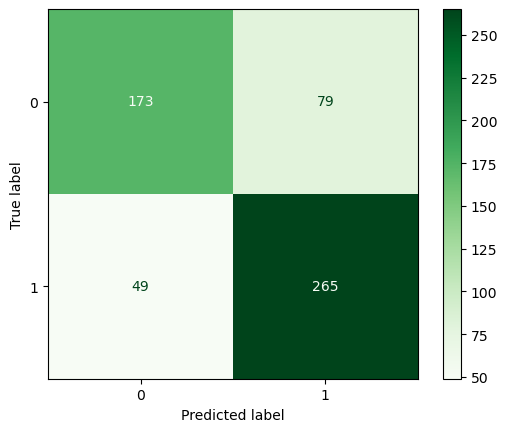

In [120]:
y_predict = GSxgb.predict(X_test)
scores = cross_val_score(GSxgb, X_train, y_train, cv = 10,  n_jobs = -2)
print(scores)
print("Classification Report:\n", classification_report(y_test, y_predict))
print("Mean Accuracy:",scores.mean())
print("MSE", mean_squared_error(y_test, y_predict))
print("MAE",  mean_absolute_error(y_test, y_predict))
print("r2 Score", r2_score(y_test, y_predict))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot(cmap='Greens')
plt.show()

### KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1,algorithm='brute',metric="euclidean")
knn.fit(X,np.ravel(y))
prediction = knn.predict(X)
accuracy = accuracy_score(np.ravel(y),prediction)
print(accuracy)

1.0


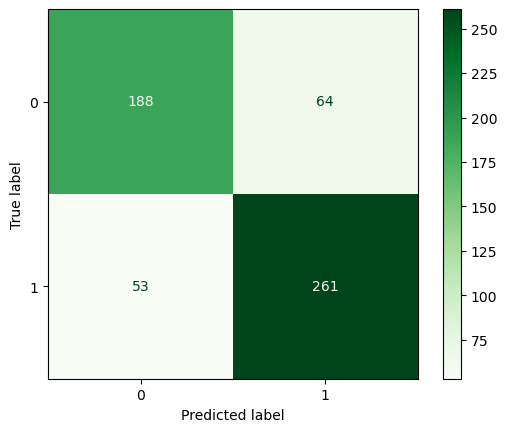

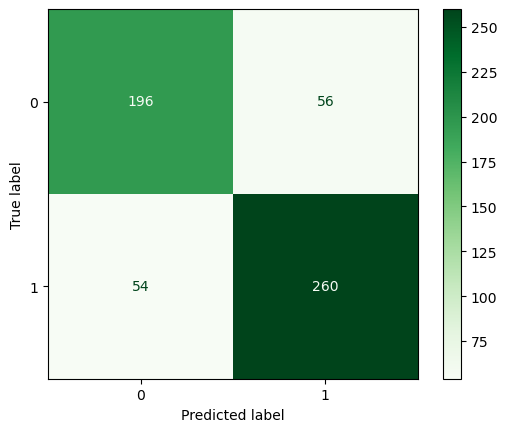

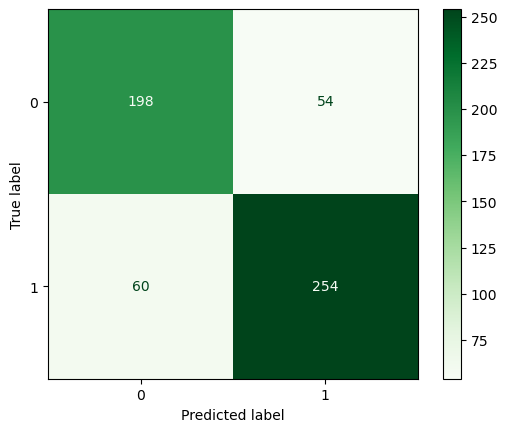

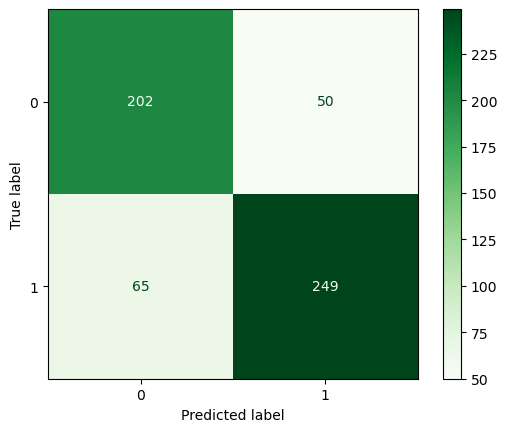

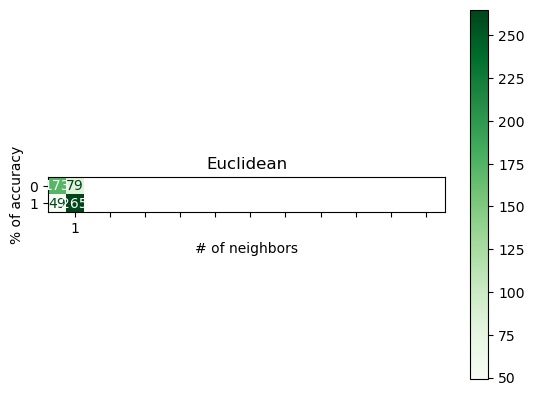

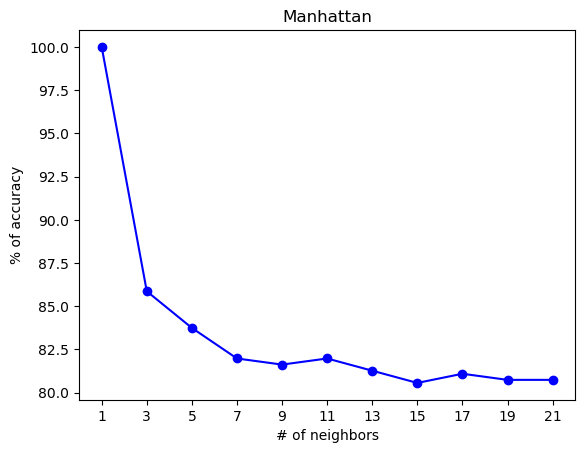

In [73]:
plt.xlabel("# of neighbors")
plt.ylabel("% of accuracy")
plt.title("Euclidean")
eucX = []
eucY = []
for k in range(1,22,2):
    eucKNN = KNeighborsClassifier(n_neighbors=k,algorithm='brute',metric="euclidean",n_jobs=-1)
    eucKNN.fit(X,np.ravel(y))
    eucPrediction = eucKNN.predict(X_test)
    eucAccuracy = 100 * accuracy_score(y_test, eucPrediction)

    eucX.append(k)
    eucY.append(eucAccuracy)
    
plt.xticks(range(1,22,2))   
plt.plot(eucX,eucY,color='red',marker='o')
plt.show()
plt.xlabel("# of neighbors")
plt.ylabel("% of accuracy")
plt.title("Manhattan")

manX = []
manY = []
for k in range(1,22,2):
    manKNN = KNeighborsClassifier(n_neighbors=k,algorithm='brute',metric="manhattan",n_jobs=-1)
    manKNN.fit(X,np.ravel(y))
    manPrediction = manKNN.predict(X_test)
    manAccuracy = 100 * accuracy_score(y_test, manPrediction)
   
    manX.append(k)
    manY.append(manAccuracy)
plt.xticks(range(1,22,2))
plt.plot(manX,manY,color='blue',marker='o')
plt.show()

### Decision Tree Classifier

[0.7437579214195182, 0.7763711257057264, 0.7801590044936052, 0.7968573568383454, 0.7885153819564467, 0.7695241387256596, 0.7755991473672081, 0.7664851941467911, 0.7475371586588315, 0.7498185274801245]


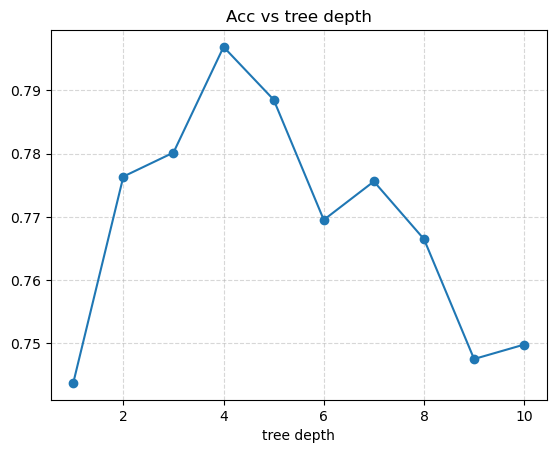

In [75]:
from sklearn.tree import DecisionTreeClassifier
accuracies_cv = []
depths = list(range(1,11))
for depth in depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42) #try ginny and entropy, try both euclidean and manhattan in the knn
    scores = cross_val_score(dt, X_train, y_train, cv = 5)
    accuracies_cv.append(np.mean(scores))
print(accuracies_cv)
plt.plot(depths, accuracies_cv, marker='o', linestyle='-')
plt.title('Acc vs tree depth')
plt.xlabel('tree depth')
plt.grid(visible=True,linestyle='--',alpha=.5)
plt.show()

In [76]:
optimal_depth = depths[np.argmax(accuracies_cv)]
optimal_depth

4

In [77]:
final_dt = DecisionTreeClassifier(criterion='entropy',max_depth = optimal_depth, random_state=42, class_weight='balanced')
final_dt.fit(X_train,y_train)
y_predict = final_dt.predict(X_test)

[0.78030303 0.77272727 0.75       0.68939394 0.79545455 0.79545455
 0.83333333 0.78787879 0.84090909 0.8778626 ]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73       252
           1       0.77      0.84      0.81       314

    accuracy                           0.77       566
   macro avg       0.77      0.77      0.77       566
weighted avg       0.77      0.77      0.77       566

Mean Accuracy: 0.773851590106007
MSE 0.22614840989399293
MAE 0.22614840989399293
r2 Score 0.08442017996158124


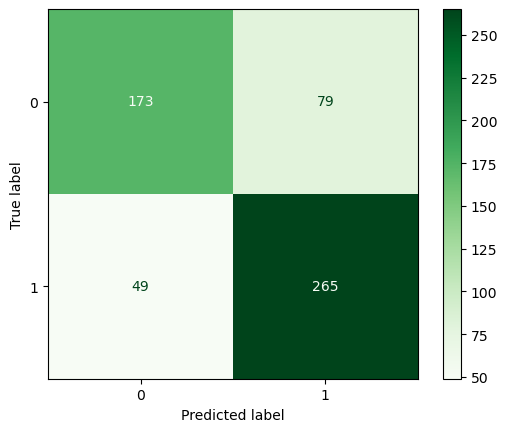

In [122]:
scores = cross_val_score(final_dt, X_train, y_train, cv = 10, n_jobs = -2)
print(scores)
print("Classification Report:\n", classification_report(y_test, y_predict))
print("Mean Accuracy:", accuracy_score(y_test, y_predict))
print("MSE", mean_squared_error(y_test, y_predict))
print("MAE", mean_absolute_error(y_test, y_predict))
print("r2 Score", r2_score(y_test, y_predict))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot(cmap='Greens')
plt.show()